In [2]:
import pandas as pd
url = "https://drive.google.com/uc?export=download&id=1-l_Au9C3-0GF_d09sjicigboIsYmCNMd"

df = pd.read_csv(url)
print(df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


1.Summary Statistics & Missing-Value Report

In [3]:
print("Checking of missing values")
print(df.isna().sum())

Checking of missing values
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [4]:
print("The description of numeric columns")
print(df.describe())

The description of numeric columns
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000  

In [5]:
null_percent = df.isnull().mean() * 100
columns_with_more_than_5pct_nulls = null_percent[null_percent > 5].index.tolist()
print("Columns with more than 5% missing values:")

Columns with more than 5% missing values:


Outlier Detection & Basic Cleaning

In [ ]:
import pandas as pd

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = (df[cols_to_check] - df[cols_to_check].mean()) / df[cols_to_check].std()

outlier_rows = (z_scores.abs() > 3).any(axis=1)

print(f"Number of outlier rows: {outlier_rows.sum()}")


Number of outlier rows: 7740


In [11]:
import os

output_dir = "data"
os.makedirs(output_dir, exist_ok=True)  
country = "benin_eda"  
output_path = os.path.join(output_dir, f"{country}_clean.csv")

df.to_csv(output_path, index=False)

print(f"Cleaned DataFrame exported to {output_path}")

Cleaned DataFrame exported to data\benin_eda_clean.csv


Time Series Analysis


c:\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


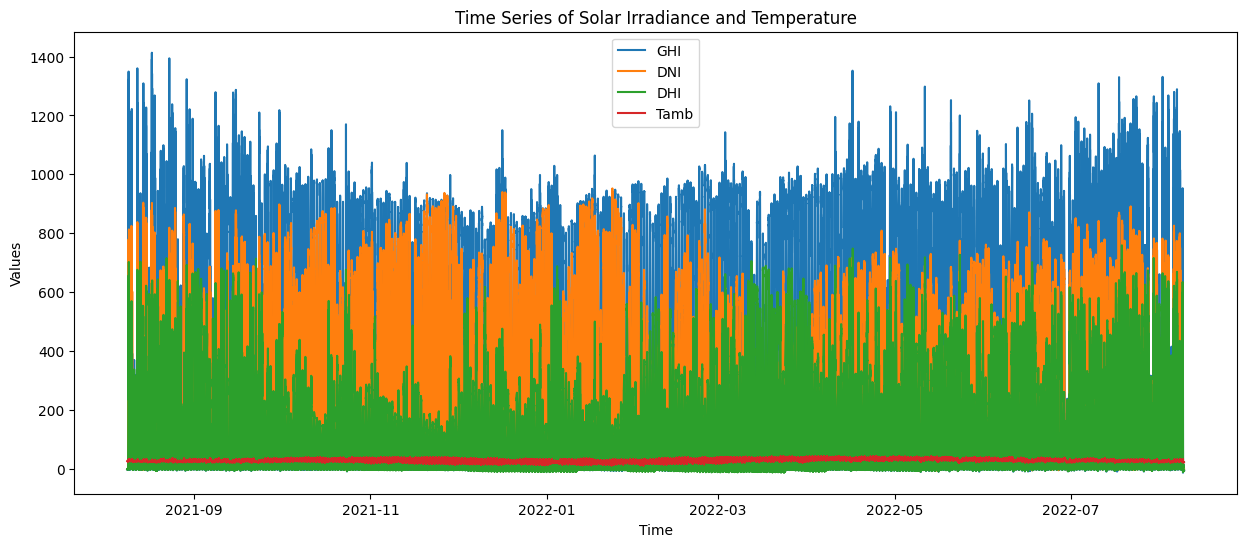

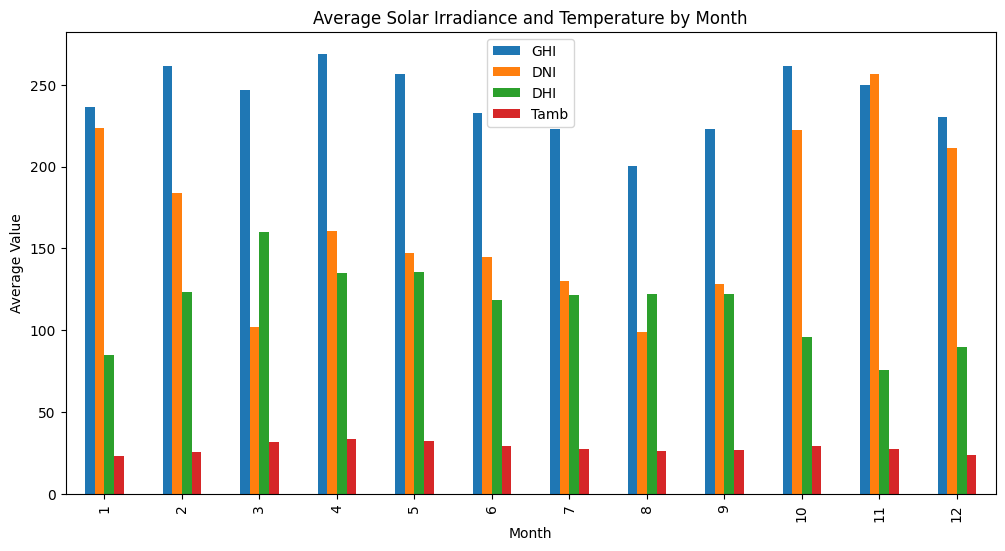

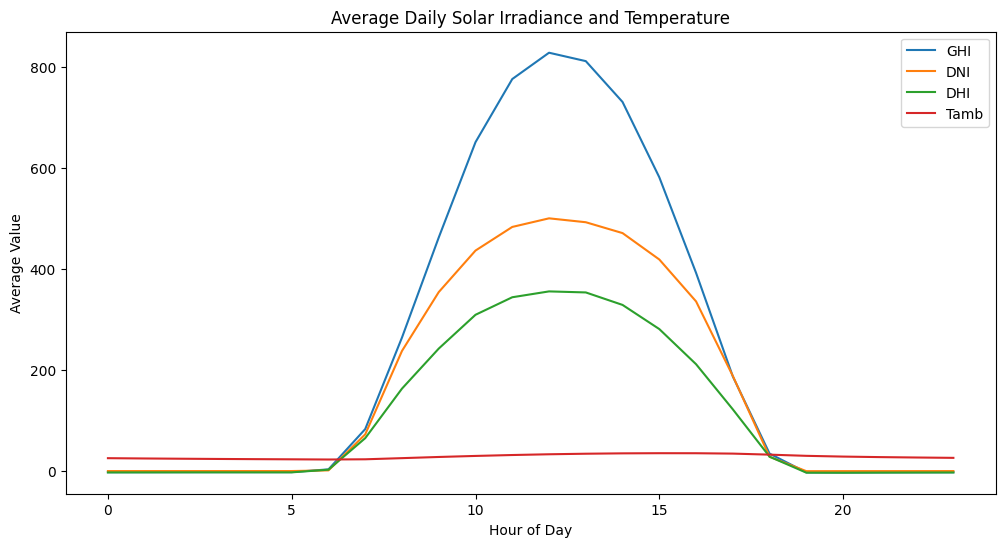

Number of anomaly rows detected: 3811
                        GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  30.3  68.2  3.2   
2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  30.4  68.4  3.4   
2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  30.6  68.2  4.7   
2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   

                     WSgust  WSstdev     WD  WDstdev   BP  Cleaning  \
Timestamp                                                             
2021-08-09 11:11:00     4.1      0.7  190.5     18.4  999         0   
2021-08-09 11:12:00     4.1      0.6  175.8     13.3  999         0   
2021-08-09 11:13:00     4.6      0.9  171.5     11.9  999         0   
2021-08-09 11:14:00     5.6      0.6  160.7      8.0  999   

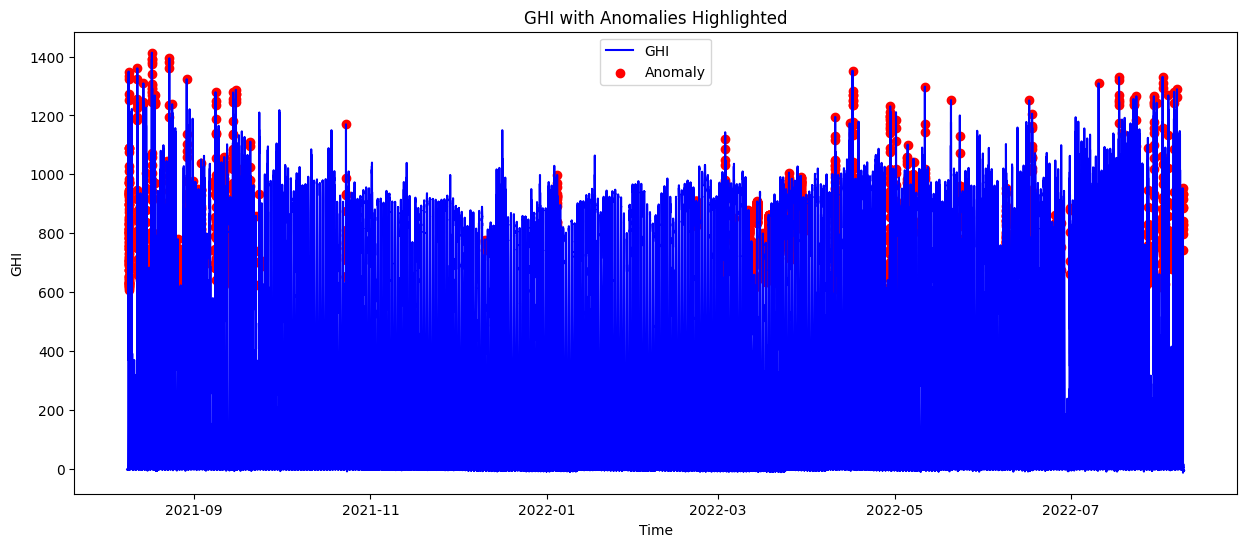

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/benin_eda_clean.csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

cols_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']

# -----------------------------
# 1. Line chart of time series
# -----------------------------
plt.figure(figsize=(15, 6))
for col in cols_to_plot:
    plt.plot(df.index, df[col], label=col)
plt.title('Time Series of Solar Irradiance and Temperature')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# -----------------------------
# 2. Monthly average bar chart
# -----------------------------
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')[cols_to_plot].mean()

monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Average Solar Irradiance and Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.show()

# -----------------------------
# 3. Daily pattern (hourly average)
# -----------------------------
df['Hour'] = df.index.hour
hourly_avg = df.groupby('Hour')[cols_to_plot].mean()

hourly_avg.plot(figsize=(12, 6))
plt.title('Average Daily Solar Irradiance and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.show()
# -----------------------------
# 4. Anomaly detection using Z-score
z_scores = (df[cols_to_plot] - df[cols_to_plot].mean()) / df[cols_to_plot].std()
anomalies = df[(z_scores.abs() > 3).any(axis=1)]

print(f"Number of anomaly rows detected: {len(anomalies)}")
print(anomalies.head())

# Optional: plot anomalies on top of GHI
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['GHI'], label='GHI', color='blue')
plt.scatter(anomalies.index, anomalies['GHI'], color='red', label='Anomaly')
plt.title('GHI with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.legend()
plt.show()


In [15]:
print(df[cols_to_plot].describe())


                 GHI            DNI            DHI           Tamb
count  525600.000000  525600.000000  525600.000000  525600.000000
mean      240.559452     167.187516     115.358961      28.179683
std       331.131327     261.710501     158.691074       5.924297
min       -12.900000      -7.800000     -12.600000      11.000000
25%        -2.000000      -0.500000      -2.100000      24.200000
50%         1.800000      -0.100000       1.600000      28.000000
75%       483.400000     314.200000     216.300000      32.300000
max      1413.000000     952.300000     759.200000      43.800000


Cleaning Impact

Average ModA & ModB pre/post-clean:
                ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


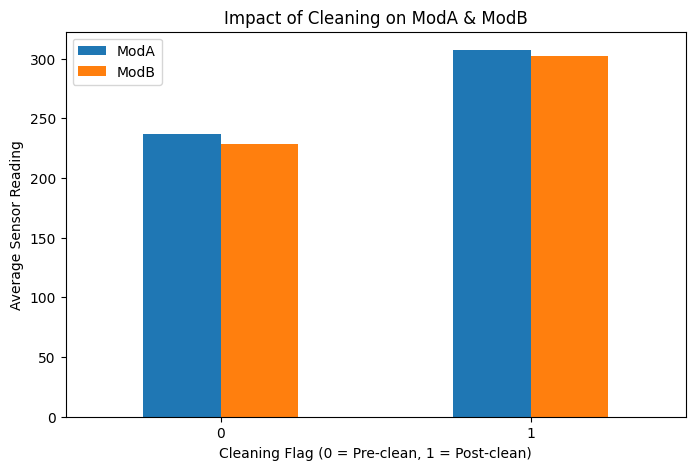

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("data/benin_eda_clean.csv")

# Ensure Cleaning flag exists
# df['Cleaning'] = 0 or 1 if you need to add it manually

# Group by Cleaning flag and compute average of ModA & ModB
grouped = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Average ModA & ModB pre/post-clean:")
print(grouped)

# Plotting impact
grouped.plot(kind='bar', figsize=(8, 5))
plt.title('Impact of Cleaning on ModA & ModB')
plt.xlabel('Cleaning Flag (0 = Pre-clean, 1 = Post-clean)')
plt.ylabel('Average Sensor Reading')
plt.xticks(rotation=0)
plt.show()


Correlation & Relationship Analysis

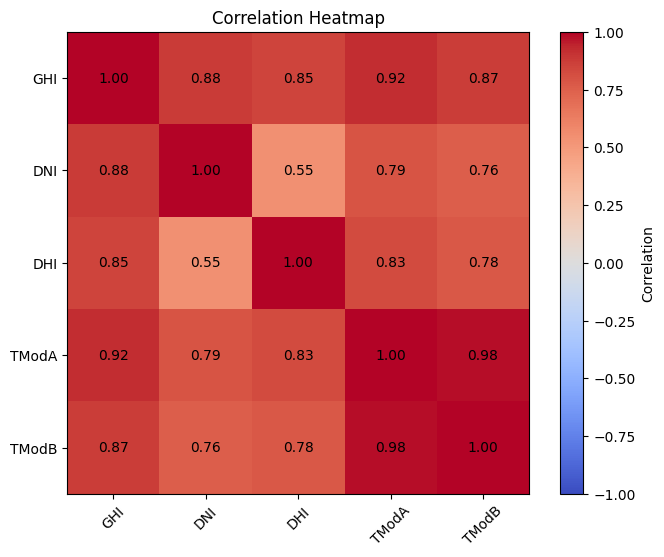

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/benin_eda_clean.csv")

cols_corr = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[cols_corr].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(cols_corr)), cols_corr, rotation=45)
plt.yticks(range(len(cols_corr)), cols_corr)

for i in range(len(cols_corr)):
    for j in range(len(cols_corr)):
        plt.text(j, i, f"{corr_matrix.iloc[i,j]:.2f}",
                 ha='center', va='center', color='black')
plt.title('Correlation Heatmap')
plt.show()


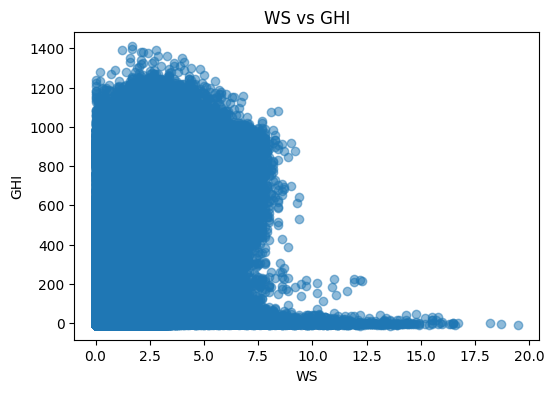

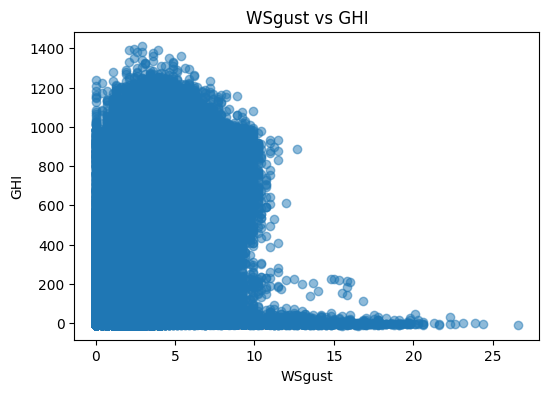

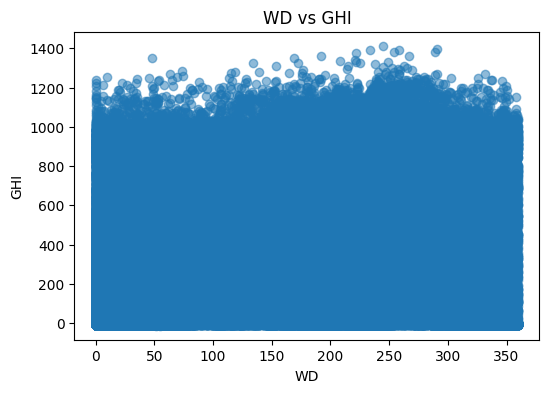

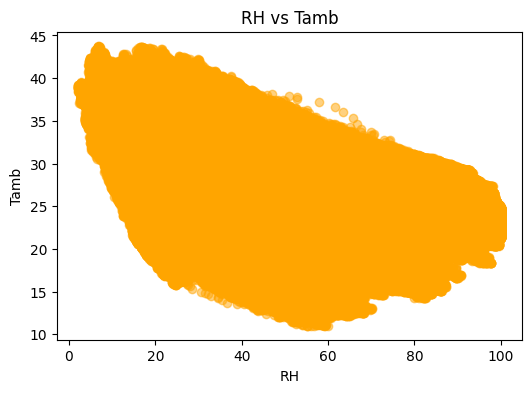

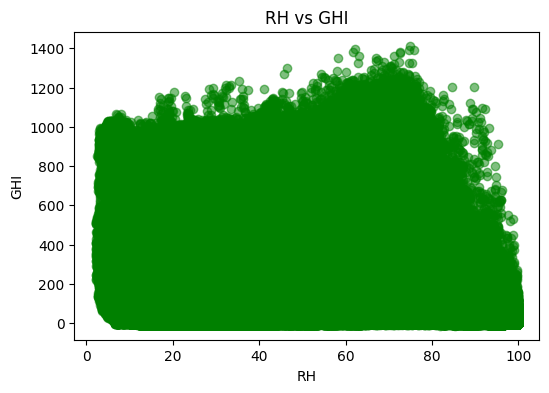

In [19]:
scatter_cols = ['WS', 'WSgust', 'WD']

for col in scatter_cols:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df['GHI'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('GHI')
    plt.title(f'{col} vs GHI')
    plt.show()

# RH vs Tamb
plt.figure(figsize=(6,4))
plt.scatter(df['RH'], df['Tamb'], alpha=0.5, color='orange')
plt.xlabel('RH')
plt.ylabel('Tamb')
plt.title('RH vs Tamb')
plt.show()

# RH vs GHI
plt.figure(figsize=(6,4))
plt.scatter(df['RH'], df['GHI'], alpha=0.5, color='green')
plt.xlabel('RH')
plt.ylabel('GHI')
plt.title('RH vs GHI')
plt.show()


Wind & Distribution Analysis


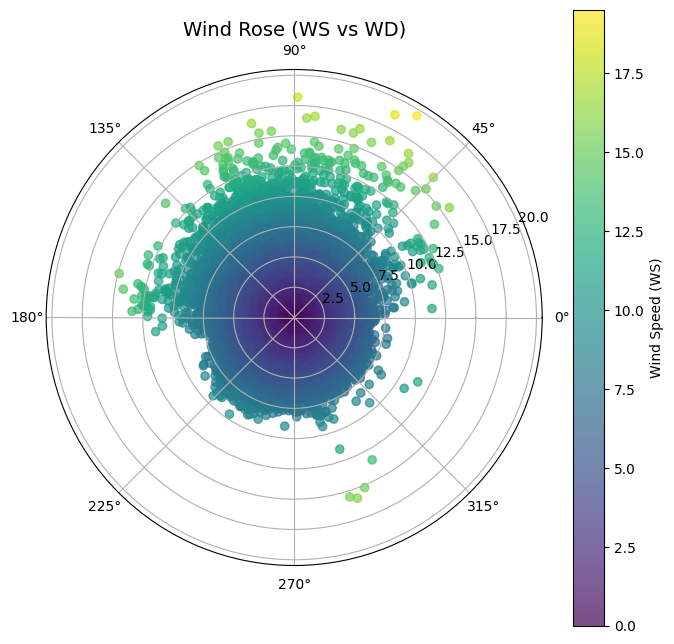

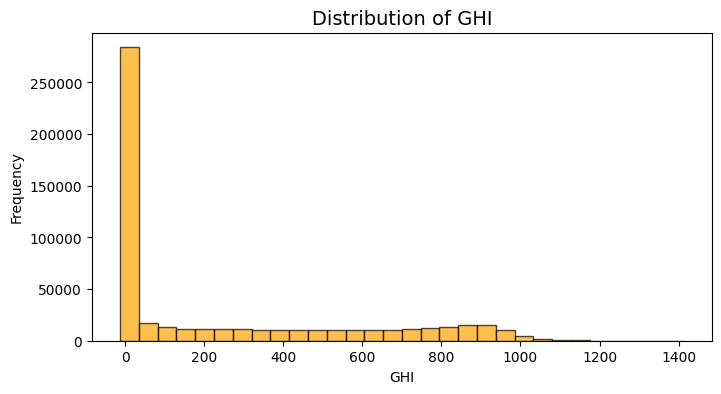

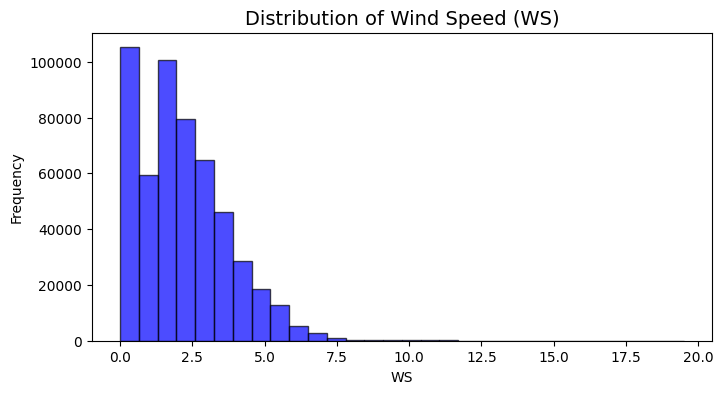

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 

df = pd.read_csv("data/benin_eda_clean.csv")


theta = np.radians(df['WD'])
r = df['WS']

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
sc = ax.scatter(theta, r, c=r, cmap='viridis', alpha=0.7)
plt.title("Wind Rose (WS vs WD)", fontsize=14)
plt.colorbar(sc, label='Wind Speed (WS)')
plt.show()


plt.figure(figsize=(8,4))
plt.hist(df['GHI'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of GHI', fontsize=14)
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8,4))
plt.hist(df['WS'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Wind Speed (WS)', fontsize=14)
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.show()


Temperature Analysis and Bubble Chart

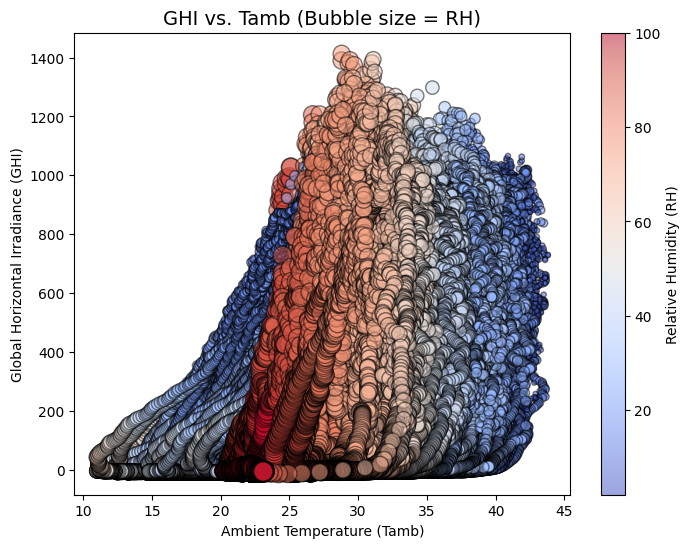

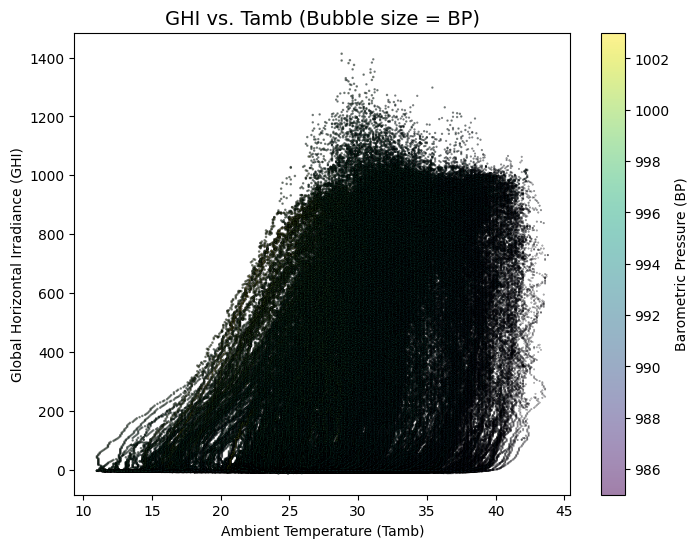

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/benin_eda_clean.csv")

df = df.dropna(subset=['GHI', 'Tamb', 'RH', 'BP'])

# -----------------------------
# 1️⃣ Bubble Chart: GHI vs Tamb, Bubble Size = RH
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*2, alpha=0.5, c=df['RH'], cmap='coolwarm', edgecolors='k')
plt.title('GHI vs. Tamb (Bubble size = RH)', fontsize=14)
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.colorbar(label='Relative Humidity (RH)')
plt.show()

# -----------------------------
# 2️⃣ Bubble Chart: GHI vs Tamb, Bubble Size = BP
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(df['Tamb'], df['GHI'], s=(df['BP'] - df['BP'].min())*0.05, alpha=0.5, c=df['BP'], cmap='viridis', edgecolors='k')
plt.title('GHI vs. Tamb (Bubble size = BP)', fontsize=14)
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.colorbar(label='Barometric Pressure (BP)')
plt.show()
